In [6]:
pip install dlib

     ---------------------------------------- 0.0/100.1 MB ? eta -:--:--
     ---------------------------------------- 0.2/100.1 MB 3.1 MB/s eta 0:00:33
     ---------------------------------------- 0.7/100.1 MB 7.0 MB/s eta 0:00:15
     ---------------------------------------- 1.0/100.1 MB 7.0 MB/s eta 0:00:15
      --------------------------------------- 1.5/100.1 MB 8.1 MB/s eta 0:00:13
      --------------------------------------- 2.0/100.1 MB 8.5 MB/s eta 0:00:12
     - -------------------------------------- 2.5/100.1 MB 8.9 MB/s eta 0:00:12
     - -------------------------------------- 3.0/100.1 MB 9.2 MB/s eta 0:00:11
     - -------------------------------------- 3.5/100.1 MB 9.8 MB/s eta 0:00:10
     - -------------------------------------- 3.5/100.1 MB 8.3 MB/s eta 0:00:12
     - -------------------------------------- 4.3/100.1 MB 9.5 MB/s eta 0:00:11
     - -------------------------------------- 4.8/100.1 MB 9.6 MB/s eta 0:00:10
     -- ------------------------------------- 5


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for dlib: filename=dlib-19.24.2-cp39-cp39-win_amd64.whl size=2833817 sha256=a41fe0f951b10188581b31abff0d67c3be48b876029de08428943e74b76ed272
  Stored in directory: c:\users\zouxu\appdata\local\pip\cache\wheels\f7\ae\0e\3478eae12f6aed0e3d4880147ca855ba5d58f2e1098c73ab5f
Successfully built dlib


In [7]:
pip install face_recognition

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import face_recognition
from PIL import Image, ImageDraw
from IPython.display import display

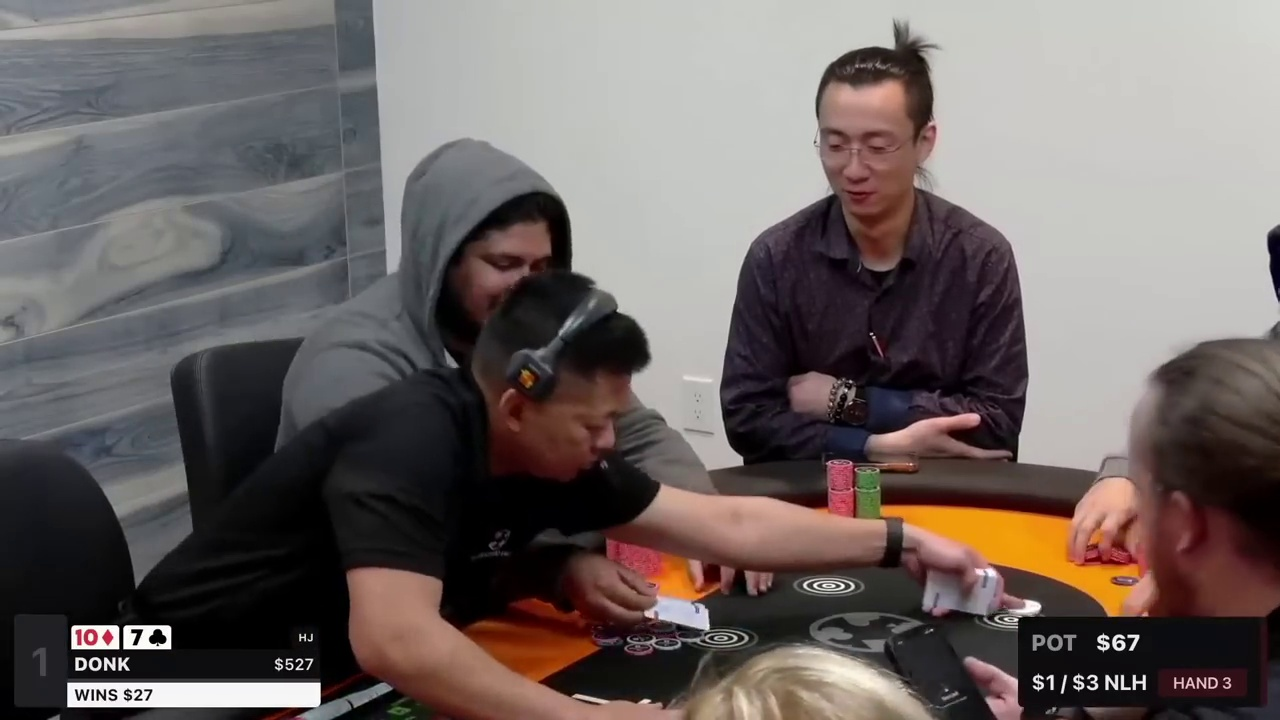

In [3]:
pil_im = Image.open("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/test/0-08-55.jpg")
display(pil_im)

In [4]:
# cut face from picture
image_path = "C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/test/0-08-55.jpg"
image = face_recognition.load_image_file(image_path)

face_locations = face_recognition.face_locations(image)

print("find {} face。".format(len(face_locations)))

for i, face_location in enumerate(face_locations):
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    
    face_image_path = "C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/face/face_{}.png".format(i)
    
    pil_image.save(face_image_path)

print("All detected faces saved.")


find 1 face。
All detected faces saved.


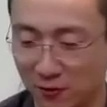

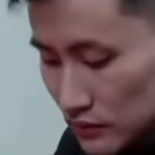

In [5]:
# save face
face_0 = Image.open("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/face/face_0.png")
face_1 = Image.open("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/face/face_1.png")

display(face_0)
display(face_1)

Learned encoding for 2 images.


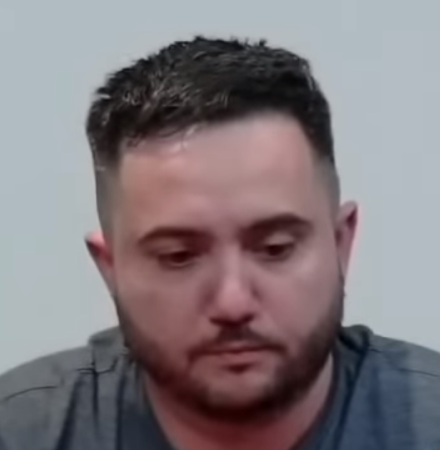

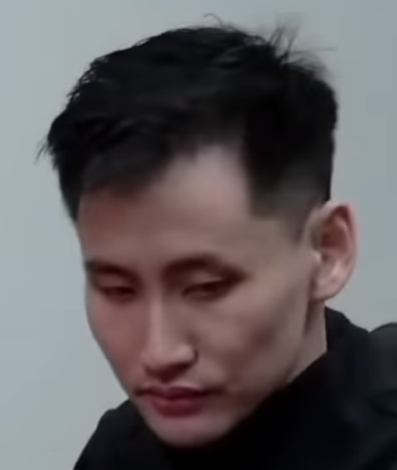

In [37]:
# test if image can encode
def load_and_encode_image(image_path):
    image = face_recognition.load_image_file(image_path)
    face_encodings = face_recognition.face_encodings(image)
    if face_encodings:
        return face_encodings[0]
        return None 

A_image_path = "C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/0_5.png"
B_image_path = "C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/0_8.png"

A_encoding = load_and_encode_image(A_image_path)
B_encoding = load_and_encode_image(B_image_path)

known_face_encodings = [encoding for encoding in [A_encoding, B_encoding] if encoding is not None]
known_face_names = ["A", "B"]

print('Learned encoding for', len(known_face_encodings), 'images.')

face_00 = Image.open("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/0_5.png")
face_11 = Image.open("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/0_8.png")

display(face_00)
display(face_11)


In [34]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# Load a sample picture and learn how to recognize it.
A_image = face_recognition.load_image_file("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/0_5.png")
A_encoding = face_recognition.face_encodings(A_image)[0]

B_image = face_recognition.load_image_file("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/0_8.png")
B_encoding = face_recognition.face_encodings(B_image)[0]

known_face_encodings = [
    A_encoding,
    B_encoding,
]
known_face_names = [
    "A",
    "B",
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.


C:\Users\zouxu\AppData\Local\Temp\ipykernel_21832\793082482.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
C:\Users\zouxu\AppData\Local\Temp\ipykernel_21832\793082482.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


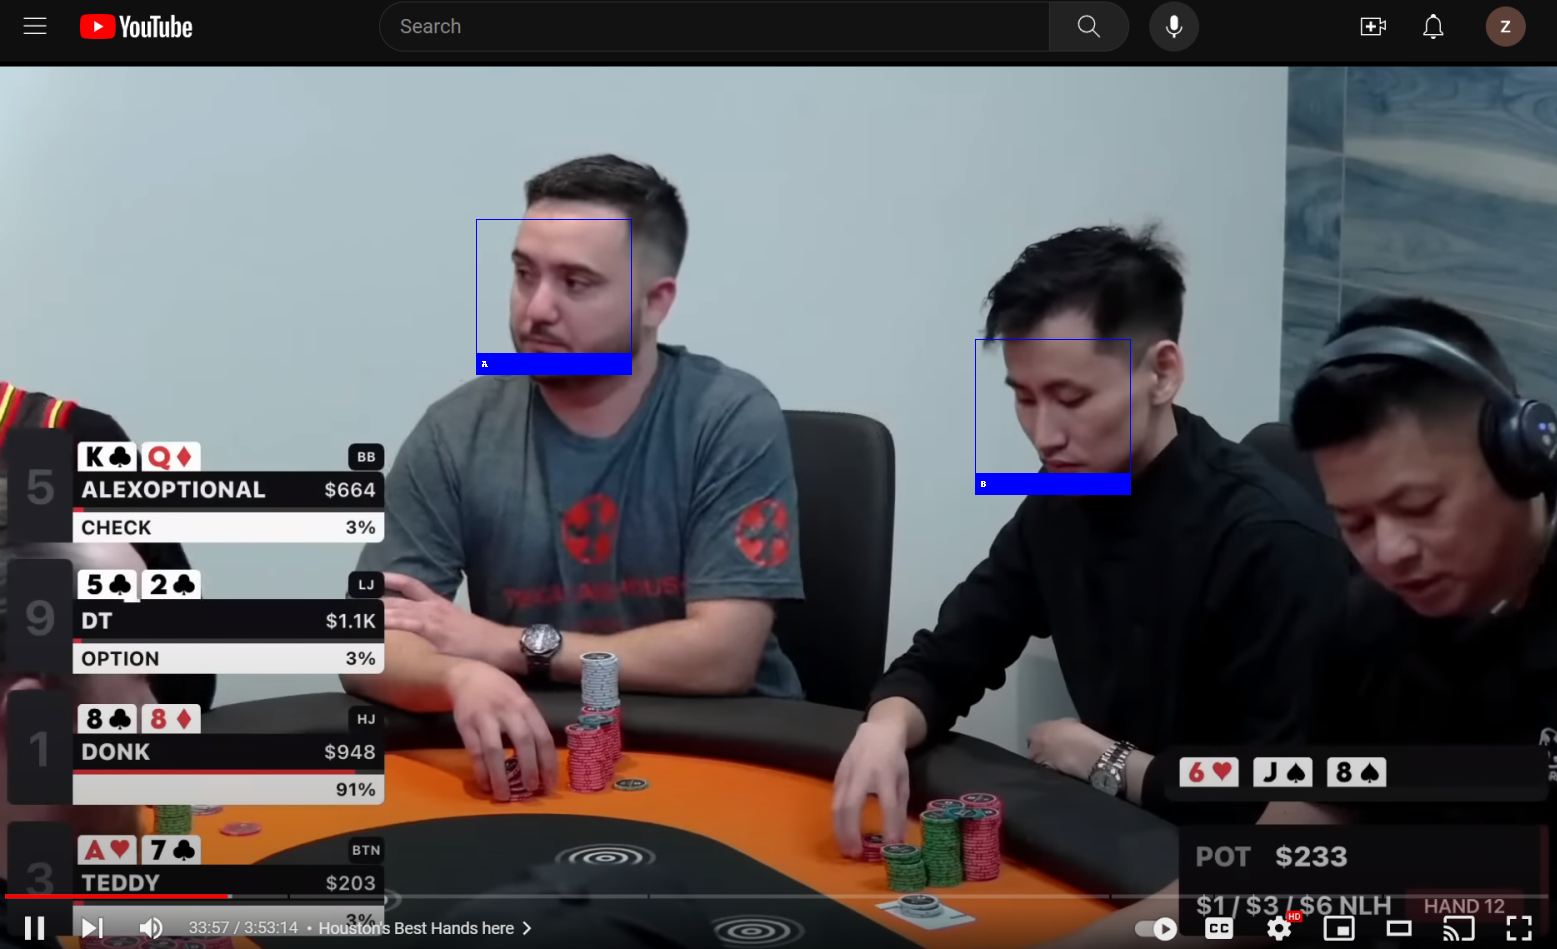

In [35]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/face/4.png")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

In [3]:
import cv2
import face_recognition


face_locations = []
face_encodings = []
face_names = []
known_face_encodings = []  
known_face_names = []  

A_image = face_recognition.load_image_file("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/0_5.png")
A_encoding = face_recognition.face_encodings(A_image)[0]

B_image = face_recognition.load_image_file("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/0_8.png")
B_encoding = face_recognition.face_encodings(B_image)[0]

known_face_encodings = [
    A_encoding,
    B_encoding,
]
known_face_names = [
    "A",
    "B",
]

video_capture = cv2.VideoCapture("C:/Users/zouxu/OneDrive/Desktop/p poker/dataset/video/1.mp4")

frame_skip = 5  
current_frame = 0  

while True:
    ret, frame = video_capture.read()

 
    if not ret:
        break

    if current_frame % (frame_skip + 1) == 0:

        face_locations = face_recognition.face_locations(frame)
        face_encodings = face_recognition.face_encodings(frame, face_locations)

    
        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown" 
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]

            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

        cv2.imshow('Video', frame)

    current_frame += 1  


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()